In [88]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from IPython.display import display
from scipy.stats import yeojohnson

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import plot_model

# Load the dataset
df = pd.read_csv('churn-bigml-80.csv')

In [89]:
display(df)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [90]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

None

In [91]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [92]:
# state_encoder = LabelEncoder()
# df['State'] = state_encoder.fit_transform(df['State'])

In [93]:
df.drop(columns=['Area code','State'], inplace= True)

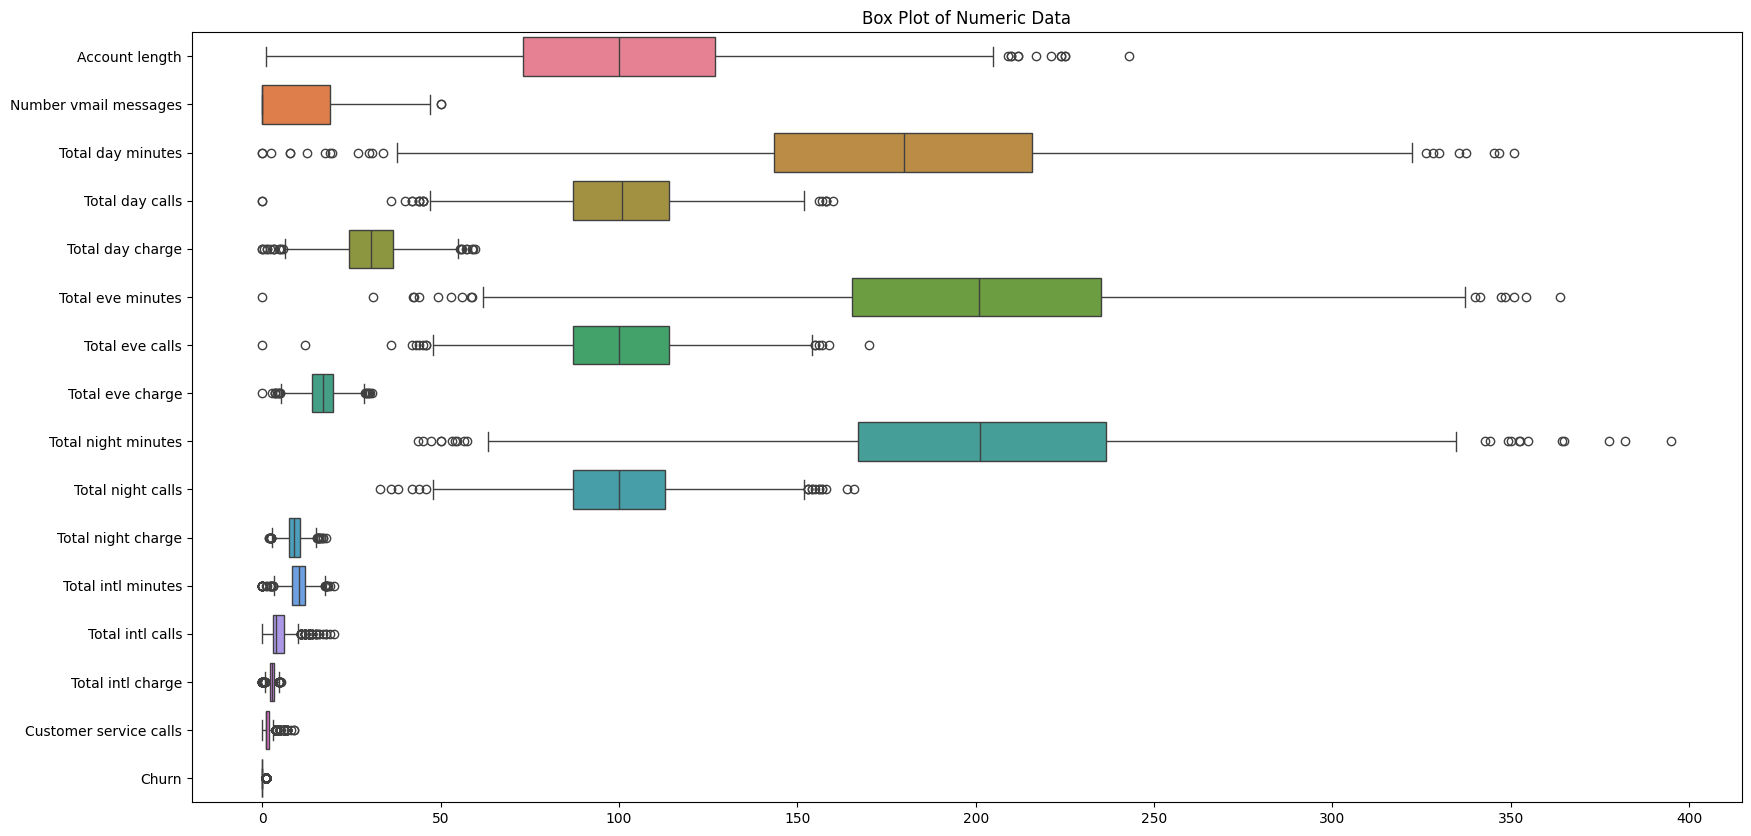

In [94]:
#boxplot of all variables in dataset
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Numeric Data')
plt.show()

In [95]:
#combine redundant columns and drop them
df['Total Calls'] = (df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls'])
df['Total Minutes'] = ( df['Total day minutes'] +df['Total eve minutes'] +df['Total night minutes']+df['Total intl minutes'])
df['Total Charge'] = (df['Total day charge'] +df['Total eve charge'] + df['Total night charge']+df['Total intl charge'])
df.drop(columns=['Number vmail messages','Total eve calls','Total eve charge','Total eve minutes','Total day calls','Total day charge','Total day minutes','Total night calls','Total night charge','Total night minutes','Total intl charge','Total intl minutes'], inplace= True)

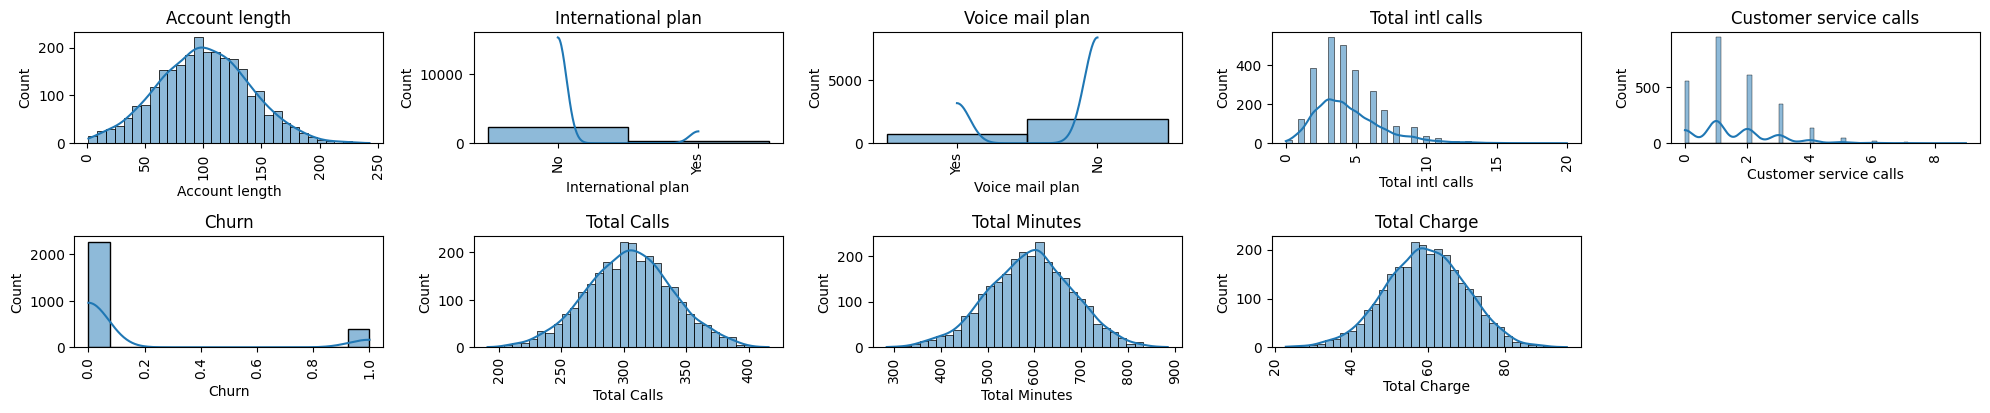

In [96]:
#Hist plot of all data
plt.figure(figsize= (20, 20))
for i , col in enumerate(df.columns):
    plt.subplot(10, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [97]:
df.shape

(2666, 9)

In [98]:
def Outlier_removal_IQR (df, columns):
    df_coppy = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_coppy = df_coppy[(df_coppy[col] >= lower_bound) & (df_coppy[col]<= upper_bound)]
    return df_coppy

numeric_columns = df.select_dtypes(include=['int64', 'float64','int32']).columns.to_list()
df = Outlier_removal_IQR(df, numeric_columns)

In [99]:
df.shape

(2348, 9)

In [100]:
#Check scewness of alll numeric features
columns_to_change = ""
for col in df.select_dtypes(include=['int64', 'float64','int32']).columns:
    skew_val = df[col].skew()
    if abs(skew_val) >= 0.5:
        print(f"{col} has skewness: {skew_val:.2f}")
        columns_to_change += col

Total intl calls has skewness: 0.63


In [101]:
#handeling the scewness
for col in [columns_to_change]:
    df[col], _ = yeojohnson(df[col])

In [102]:
#scale the data 
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
scaler.fit(df[numeric_columns])
scaled_data = scaler.transform(df[numeric_columns])
df[numeric_columns] = scaled_data

In [103]:
#convert categorical variables to numerical values
df['Churn'] = df['Churn'].map({True: 1, False: 0})
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

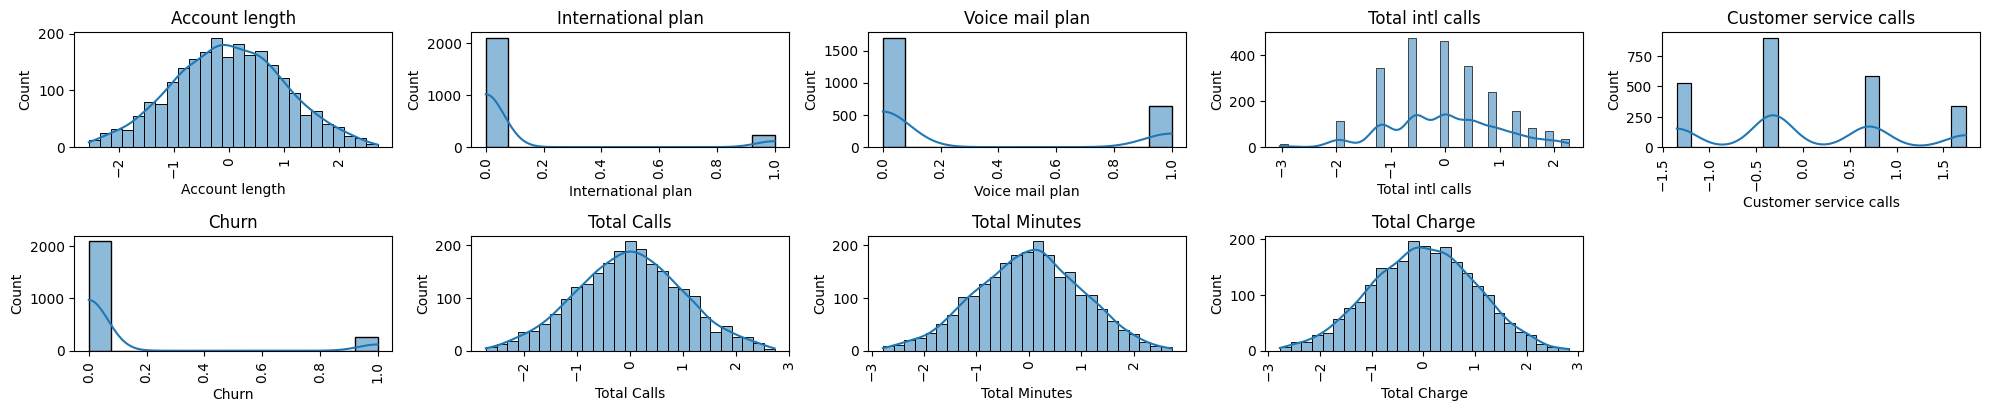

In [104]:
#hist plot of all data
plt.figure(figsize= (20, 20))
for i , col in enumerate(df.columns):
    plt.subplot(10, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

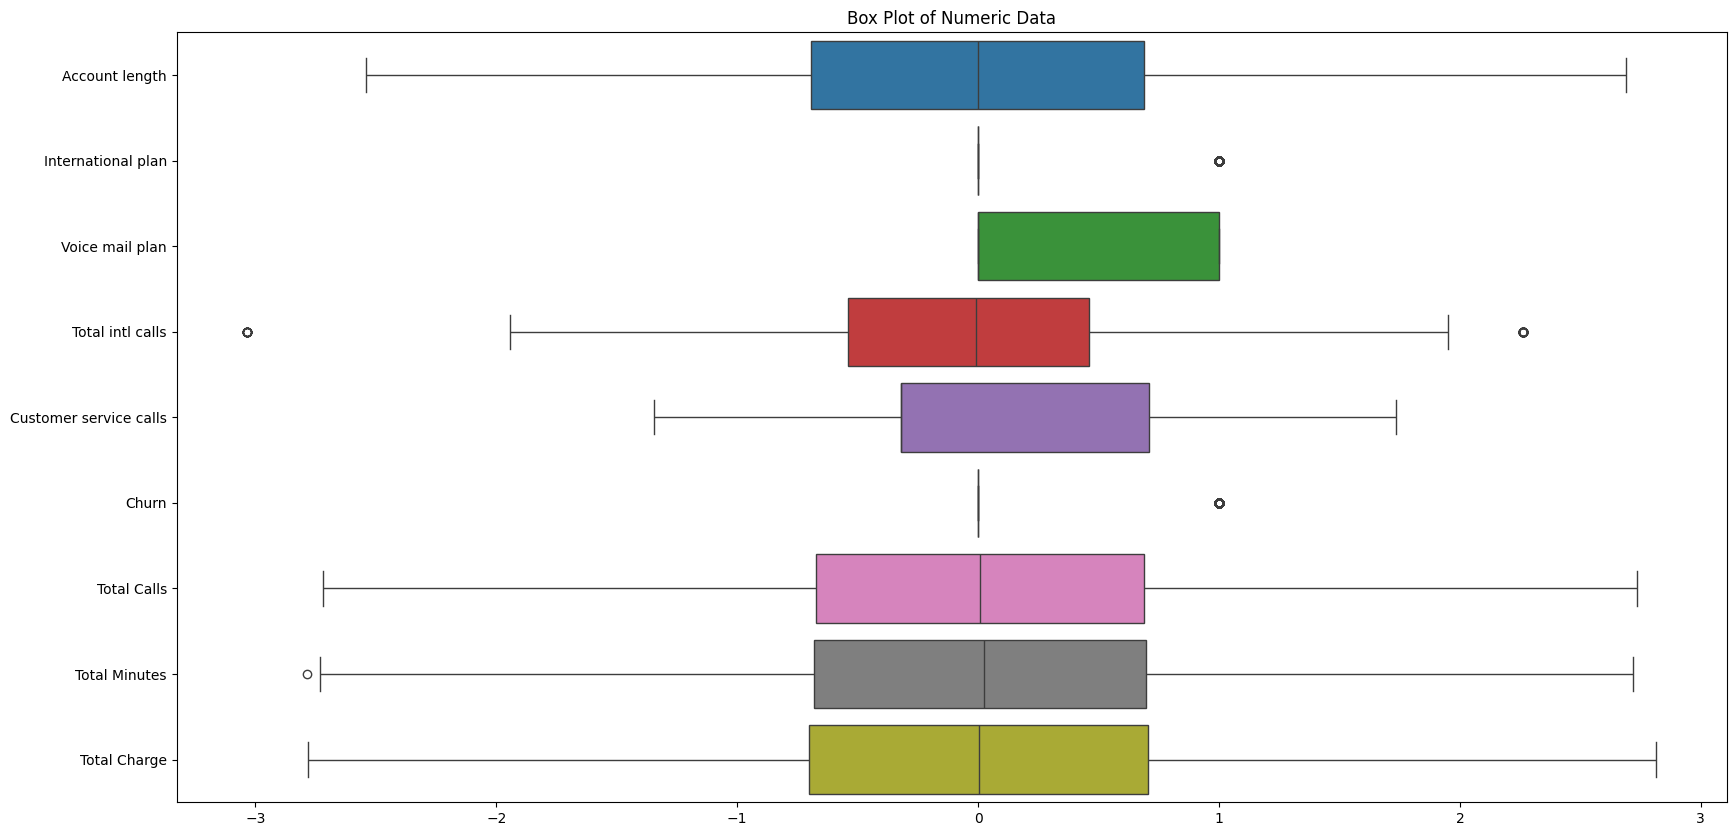

In [105]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Numeric Data')
plt.show()

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2348 entries, 0 to 2665
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2348 non-null   float64
 1   International plan      2348 non-null   int64  
 2   Voice mail plan         2348 non-null   int64  
 3   Total intl calls        2348 non-null   float64
 4   Customer service calls  2348 non-null   float64
 5   Churn                   2348 non-null   int64  
 6   Total Calls             2348 non-null   float64
 7   Total Minutes           2348 non-null   float64
 8   Total Charge            2348 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 183.4 KB


<Axes: xlabel='Churn', ylabel='count'>

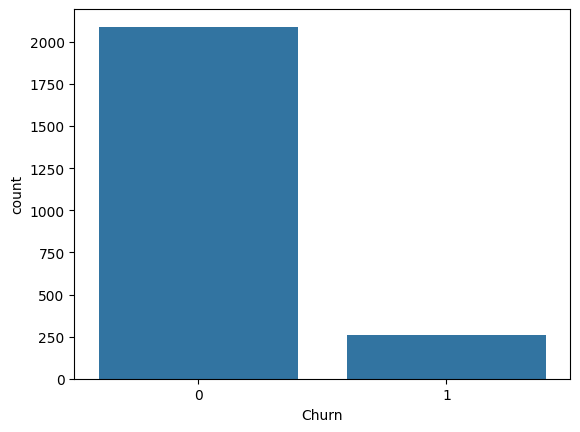

In [108]:
#Check how many churned and non-churned customers there are
sns.countplot(data=df, x='Churn')

In [109]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
print(df.columns.tolist())

['Account length', 'International plan', 'Voice mail plan', 'Total intl calls', 'Customer service calls', 'Churn', 'Total Calls', 'Total Minutes', 'Total Charge']


In [112]:
#Train Logistic Regression & Random Forest
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [113]:
rf = RandomForestClassifier(  
    n_estimators=100,          # Number of trees
    max_depth=8,              # Limit depth of trees
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=4,        # Minimum samples at leaf
    bootstrap=True,            # Use bootstrapped datasets
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [114]:
knn = KNeighborsClassifier()

In [115]:
# Grid search to find best K
param_grid = {'n_neighbors': range(3, 20)}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_

In [116]:
ann = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32)

Epoch 1/50


c:\Users\jpsea\OneDrive - belgiumcampus.ac.za\Class work\MLG 382\Project rework\virtual-py\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5273 - loss: 0.7083 - val_accuracy: 0.8830 - val_loss: 0.4321
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8917 - loss: 0.3915 - val_accuracy: 0.8830 - val_loss: 0.3424
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9019 - loss: 0.3052 - val_accuracy: 0.8830 - val_loss: 0.3077
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8867 - loss: 0.3088 - val_accuracy: 0.8830 - val_loss: 0.2886
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8924 - loss: 0.2836 - val_accuracy: 0.8894 - val_loss: 0.2743
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9016 - loss: 0.2776 - val_accuracy: 0.9085 - val_loss: 0.2624
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9105 - loss: 0.2544 - val_accuracy: 0.9085 - val_loss: 0.2521
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9000 - loss: 0.2670 - val_accuracy: 0.9170 - val_loss: 0.2437
Epo

In [117]:
loss, ann_accuracy = ann.evaluate(X_test, y_test)
print("ANN Accuracy:", ann_accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9510 - loss: 0.1593 
ANN Accuracy: 0.9446808695793152


In [118]:
# Get the number of input features
n_features = X_train.shape[1]
 
# Define the MLP model
mlp_model = Sequential([
    Input(shape=(n_features,)),  # Explicitly define the input shape as the first layer
    Dense(units=64, activation='relu', input_shape=(n_features,)),
    Dropout(0.5),  # Dropout for regularization
    Dense(units=32, activation='relu'),
    Dropout(0.3),  # Another dropout layer
    Dense(units=1, activation='sigmoid')  # Output layer for binary classification (churn probability)
])
 
# Compile the model
mlp_model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Suitable loss function for binary classification
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
 
# Print the model summary to see its structure
mlp_model.summary()

c:\Users\jpsea\OneDrive - belgiumcampus.ac.za\Class work\MLG 382\Project rework\virtual-py\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
# Train the model
history = mlp_model.fit(X_train, y_train,
                        epochs=50,  # Number of training epochs
                        batch_size=32,  # Batch size for training
                        validation_data=(X_test, y_test),
                        verbose=1)  # Show training progress
 
# Make predictions on the test set
y_prob_mlp = mlp_model.predict(X_test)
y_pred_mlp = (y_prob_mlp > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7954 - auc: 0.4416 - loss: 0.5302 - val_accuracy: 0.8830 - val_auc: 0.6281 - val_loss: 0.3577
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8937 - auc: 0.5850 - loss: 0.3647 - val_accuracy: 0.8830 - val_auc: 0.7707 - val_loss: 0.3149
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8963 - auc: 0.6652 - loss: 0.3300 - val_accuracy: 0.8830 - val_auc: 0.8253 - val_loss: 0.2920
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8927 - auc: 0.7615 - loss: 0.3166 - val_accuracy: 0.8830 - val_auc: 0.8406 - val_loss: 0.2796
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8968 - auc: 0.7423 - loss: 0.3107 - val_accuracy: 0.8872 - val_auc: 0.8559 - val_loss: 0.2666
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8909 - auc: 0.7687 - loss: 0.3086 - val_accuracy: 0.8915 - val_auc: 0.8628 - val_loss: 0.2580
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [120]:
#Evaluation
knn_y_train_pred = best_knn.predict(X_train)
knn_y_test_pred = best_knn.predict(X_test)

lr_y_train_pred = lr.predict(X_train)
lr_y_test_pred = lr.predict(X_test)

rf_y_train_pred = rf.predict(X_train)
rf_y_test_pred = rf.predict(X_test)

ann_y_train_pred = rf.predict(X_train)
ann_y_test_pred = rf.predict(X_test)


mlp_y_train_pred = mlp_model.predict(X_train)
mlp_y_test_pred = mlp_model.predict(X_test)


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [121]:
def display_model_metrics(model_name, y_true, y_pred):
    print(f'{model_name}:\nClassification Report:')
    print(classification_report(y_true, y_pred))


display_model_metrics("Logistic regression (Train)", y_train, lr_y_train_pred)
display_model_metrics("Logistic Regression (Test)", y_test, lr_y_test_pred)

display_model_metrics("Random Forest (Train)", y_train, rf_y_train_pred)
display_model_metrics("Random Forest (Test)", y_test, rf_y_test_pred)

display_model_metrics("KNN (Train)", y_train, knn_y_train_pred)
display_model_metrics("KNN (Test)", y_test, knn_y_test_pred)

Logistic regression (Train):
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1675
           1       0.62      0.25      0.35       203

    accuracy                           0.90      1878
   macro avg       0.77      0.61      0.65      1878
weighted avg       0.88      0.90      0.88      1878

Logistic Regression (Test):
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       415
           1       0.58      0.27      0.37        55

    accuracy                           0.89       470
   macro avg       0.74      0.62      0.66       470
weighted avg       0.87      0.89      0.87       470

Random Forest (Train):
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1675
           1       1.00      0.67      0.80       203

    accuracy                     

In [122]:
models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'KNN': best_knn,
    'ann': ann,
    'mlp_model': mlp_model
}

In [123]:
def get_accuracy_comparison(models, X_train, X_test, y_train, y_test):
    accuracy_results = []

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Get predictions
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        
             # Convert probabilities to binary class labels if needed
        if train_preds.ndim != 1 or train_preds.dtype != int:
            train_preds = (train_preds > 0.5).astype(int)
            test_preds = (test_preds > 0.5).astype(int)
            
        # Calculate accuracy
        train_accuracy = (accuracy_score(y_train, train_preds)) * 100
        test_accuracy = (accuracy_score(y_test, test_preds)) * 100
        
        # Calculate the difference in accuracy (test accuracy - train accuracy)
        accuracy_difference = test_accuracy - train_accuracy
        
        # Store results in a list
        accuracy_results.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Accuracy Difference': accuracy_difference
        })
    accuracy_df = pd.DataFrame(accuracy_results)
    return accuracy_df

In [124]:
accuracy_comparison = get_accuracy_comparison(models, X_train, X_test, y_train, y_test)
display(accuracy_comparison)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.1404
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9485 - auc: 0.9090 - loss: 0.1685
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Model,Train Accuracy,Test Accuracy,Accuracy Difference
0,Logistic Regression,90.255591,89.148936,-1.106655
1,Random Forest,96.379127,96.382979,0.003852
2,KNN,94.675186,91.914894,-2.760293
3,ann,96.272630,94.893617,-1.379013
4,mlp_model,95.899894,94.680851,-1.219042


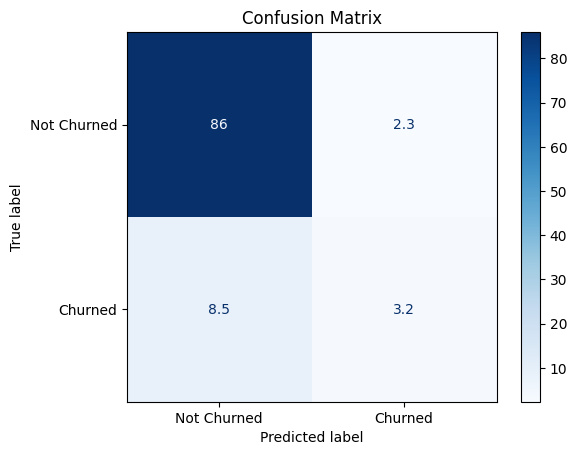

In [133]:
cm = confusion_matrix(y_test, lr_y_test_pred)
cm_percentage = cm.astype('float')/cm.sum()*100
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


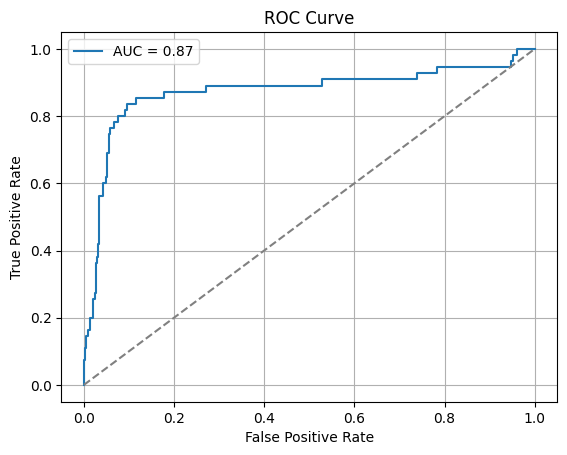

In [134]:
from sklearn.metrics import roc_curve, auc

y_probs = lr.predict_proba(X_test)[:, 1]  # Probabilities for class 1
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()